# Project Supervised Learning
## Domain Banking
### Anish Mandal

<dl>
    <dt>Context :</dt>
<dd>This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget. </dd>
    </dl>

<dl>
    <dt>Objective: </dt>
    <dd>The classification goal is to predict the likehood of a liability customer buying personal loans</dd>
</dl>

### Importing Required Library

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes = True) 

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Importing Data File as bank_data
#### Discribe Colums, Data Types, Find Null Values in data

In [3]:
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
bank_data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
bank_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
bank_data.shape

(5000, 14)

In [7]:
bank_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
bank_data.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

#### Finding Unique Values of Each Columns

In [10]:
bank_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

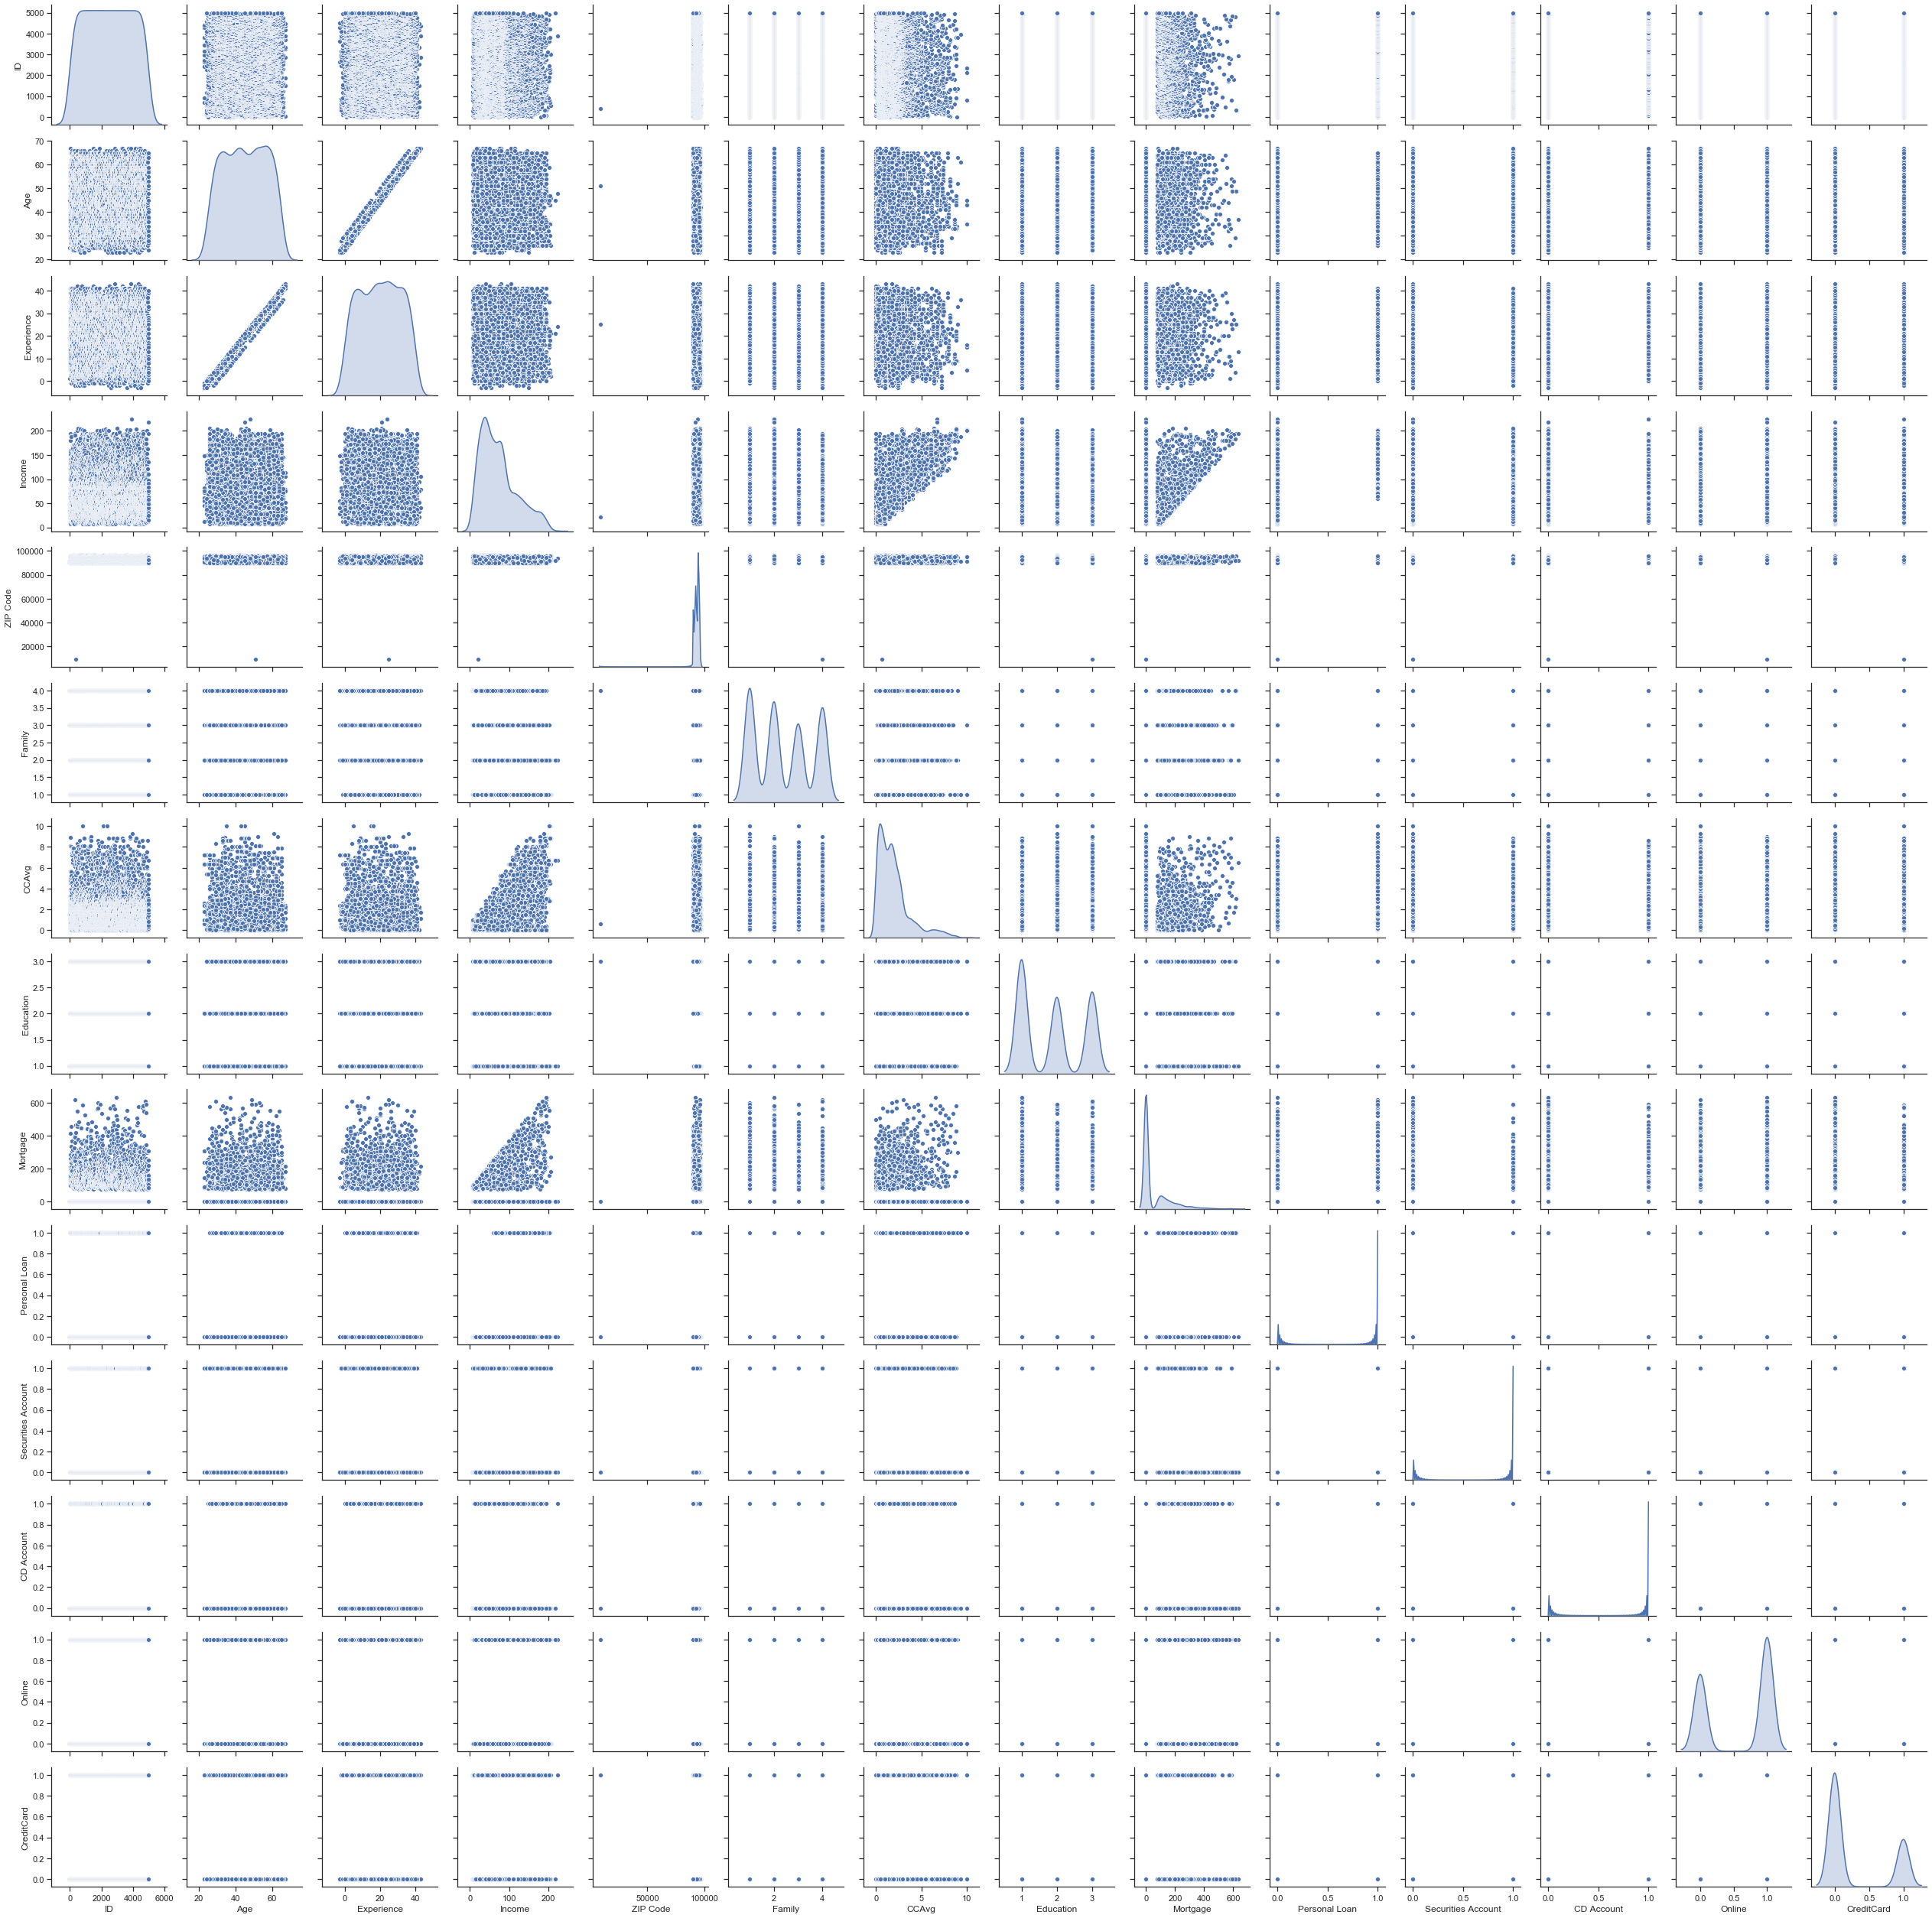

In [11]:
sns.pairplot(bank_data, diag_kind="kde")

##### Based on above obeservation attributes can be describe.

* ID
    + The following attribute not have any association
* Age
    + Interval variable
* Experiance
    + Interval variable
    + Contain nagative Values which need to remove
* Income
    + Interval variable
* Zip Code
    + The following attribute not have any association
* Family
    + Numbers of Family Members
* CCAvg
    + Interval variable
* Education
    + Need to convert in Categorical Variable
* Mortgage
    + Interval variable
* Personal Loan
    + Target Value
* Securities Account
    + Need to convert in Categorical Variable
* CD Account
    + Need to convert in Categorical Variable
* Online
    + Need to convert in Categorical Variable
* CreditCard
    + Need to convert in Categorical Variable

##### Found Experiance min value is going in nagative need to Clean Data
##### Verify Age or Experiance Can Impact Personal Loan

In [12]:
bank_data['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [13]:
sns.barplot(bank_data['Personal Loan'], bank_data['Age'])

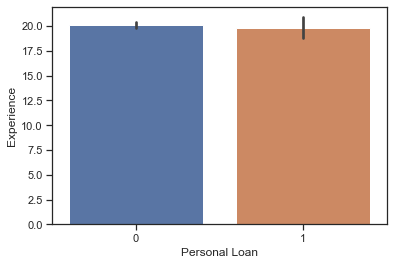

In [16]:
sns.barplot(bank_data['Personal Loan'], bank_data['Experience'])

### Obeservation
#### Age and experiance dose not impact on customer take Personal Loan Clean data by 0 on nagative experiance

In [17]:
bank_data[bank_data['Experience'] < 0]['Experience'].count()

52

In [18]:
bank_data.loc[bank_data.Experience < 0,'Experience'] = 0
bank_data[bank_data['Experience'] < 0]['Experience'].count()

0

In [19]:
bank_data['Experience'].describe()

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

#### Converting Required Categorical Variable

In [20]:
setcol=['Education', 'Securities Account', 'CD Account', 'Online','CreditCard']
bank_data[setcol] = bank_data[setcol].astype('category')

In [21]:
bank_data.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [22]:
bank_data.describe().transpose()

count          mean          std     min       25%      50%  \
ID             5000.0   2500.500000  1443.520003     1.0   1250.75   2500.5   
Age            5000.0     45.338400    11.463166    23.0     35.00     45.0   
Experience     5000.0     20.119600    11.440484     0.0     10.00     20.0   
Income         5000.0     73.774200    46.033729     8.0     39.00     64.0   
ZIP Code       5000.0  93152.503000  2121.852197  9307.0  91911.00  93437.0   
Family         5000.0      2.396400     1.147663     1.0      1.00      2.0   
CCAvg          5000.0      1.937938     1.747659     0.0      0.70      1.5   
Mortgage       5000.0     56.498800   101.713802     0.0      0.00      0.0   
Personal Loan  5000.0      0.096000     0.294621     0.0      0.00      0.0   

                    75%      max  
ID              3750.25   5000.0  
Age               55.00     67.0  
Experience        30.00     43.0  
Income            98.00    224.0  
ZIP Code       94608.00  96651.0  
Family             3.00      4.0  
CCAvg              2.50     10.0  
Mortgage         101.00    635.0  
Personal Loan      0.00      1.0

### Check Influance of each Attribues on wherher a customer takes personal Loan

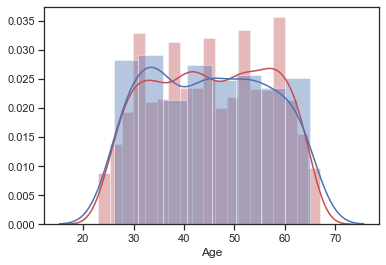

In [23]:
sns.distplot( bank_data[bank_data['Personal Loan'] == 0]['Age'], color = 'r')
sns.distplot( bank_data[bank_data['Personal Loan'] == 1]['Age'], color = 'b')

### Obeservation
* The Customer Age Fall in Range of 30 to 60
* Age Dose not Have impact on Personal Loan

In [24]:
sns.boxplot(x = 'Education',y = 'Income', hue = 'Personal Loan', data=bank_data)

### Obeservation
* The Customer who has education level 1 (Undergrad) have higher income but Personal loans not impact based on education level

In [25]:
sns.boxplot(x = 'Education',y = 'Mortgage', hue = 'Personal Loan', data=bank_data)

### Obeservation
* The Customer who has personal loan with high Mortgage

In [26]:
sns.countplot(x="Securities Account", hue="Personal Loan", data=bank_data)

### Obeservation
* The Customer who dose not have loan on Securities Account

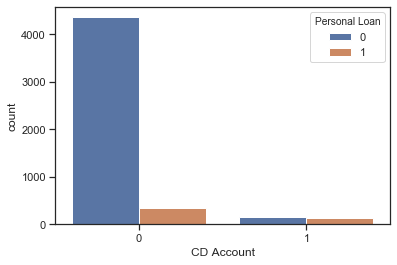

In [27]:
sns.countplot(x="CD Account", hue="Personal Loan", data=bank_data)

### Obeservation
* The Customer who dose not have loan on CD Account

In [28]:
sns.countplot(x='Family', hue='Personal Loan', data=bank_data)

### Obeservation
* Family Size dose not have imact on Personal Loan

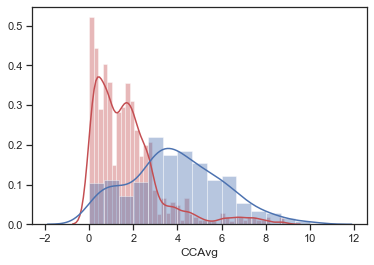

In [29]:
sns.distplot( bank_data[bank_data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( bank_data[bank_data['Personal Loan'] == 1]['CCAvg'], color = 'b')

### Obeservation
* The Customer who spend Credit Card Avarag is higher Probability to Take Personal Loan

In [30]:
sns.countplot(x='Online', hue='Personal Loan', data=bank_data)

### Obeservation
* Having Online account Not Impacting on Personal Loan

In [31]:
sns.distplot( bank_data[bank_data['Personal Loan'] == 1]['ZIP Code'], color = 'r')

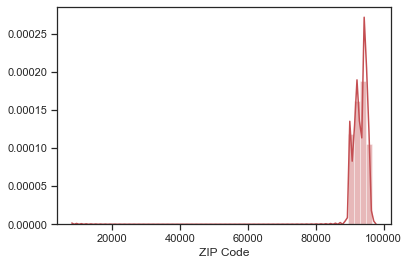

In [32]:
sns.distplot( bank_data[bank_data['Personal Loan'] == 0]['ZIP Code'], color = 'r')

In [33]:
bank_data[bank_data['Personal Loan'] == 1]['ZIP Code'].value_counts()

94720    19
94305    13
92093     9
90095     8
90089     8
         ..
91942     1
90404     1
95010     1
95521     1
95741     1
Name: ZIP Code, Length: 238, dtype: int64

### Obeservation
* Five Zip Code Location for Personal Loan

## Corelation

In [34]:
bank_data.corr()

ID       Age  Experience    Income  ZIP Code    Family  \
ID             1.000000 -0.008473   -0.008265 -0.017695  0.013432 -0.016797   
Age           -0.008473  1.000000    0.994198 -0.055269 -0.029216 -0.046418   
Experience    -0.008265  0.994198    1.000000 -0.046729 -0.028783 -0.052213   
Income        -0.017695 -0.055269   -0.046729  1.000000 -0.016410 -0.157501   
ZIP Code       0.013432 -0.029216   -0.028783 -0.016410  1.000000  0.011778   
Family        -0.016797 -0.046418   -0.052213 -0.157501  0.011778  1.000000   
CCAvg         -0.024675 -0.052012   -0.049912  0.645984 -0.004061 -0.109275   
Mortgage      -0.013920 -0.012539   -0.010840  0.206806  0.007383 -0.020445   
Personal Loan -0.024801 -0.007726   -0.007858  0.502462  0.000107  0.061367   

                  CCAvg  Mortgage  Personal Loan  
ID            -0.024675 -0.013920      -0.024801  
Age           -0.052012 -0.012539      -0.007726  
Experience    -0.049912 -0.010840      -0.007858  
Income         0.645984  0.206806       0.502462  
ZIP Code      -0.004061  0.007383       0.000107  
Family        -0.109275 -0.020445       0.061367  
CCAvg          1.000000  0.109905       0.366889  
Mortgage       0.109905  1.000000       0.142095  
Personal Loan  0.366889  0.142095       1.000000

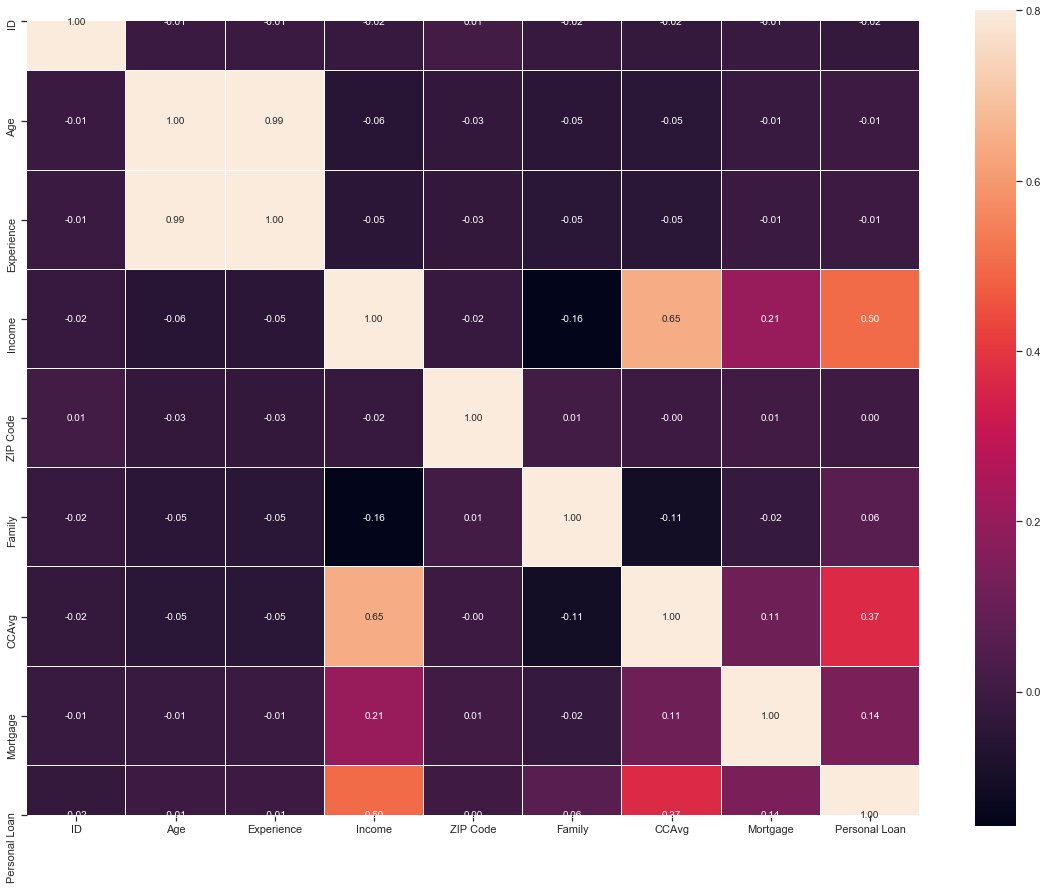

In [35]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
sns.heatmap(bank_data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)

### Obeservation
* Age and Experiance is Highly Corelated
* CCAvg and Income is somewhat Corelated

## Spliting Data

In [36]:
bank_data.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [37]:
# Droping  Data Table
bank_data = bank_data.drop('ID', axis=1)
bank_data = bank_data.drop('Experience', axis=1)
# Splitting of data to train and test
X=bank_data.drop('Personal Loan', axis=1)
Y=bank_data.loc[:,'Personal Loan']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=0)

In [38]:
X_train.describe()

Age       Income      ZIP Code       Family        CCAvg  \
count  3500.000000  3500.000000   3500.000000  3500.000000  3500.000000   
mean     45.274857    74.053714  93152.619143     2.417429     1.963066   
std      11.477448    46.254573   1755.660581     1.159123     1.750994   
min      23.000000     8.000000  90005.000000     1.000000     0.000000   
25%      35.000000    39.000000  91911.000000     1.000000     0.700000   
50%      45.000000    64.000000  93407.000000     2.000000     1.600000   
75%      55.000000    99.000000  94596.000000     4.000000     2.600000   
max      67.000000   224.000000  96651.000000     4.000000    10.000000   

          Mortgage  
count  3500.000000  
mean     55.563714  
std      99.975574  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%      99.000000  
max     635.000000

In [39]:
X_test.describe()

Age      Income      ZIP Code       Family        CCAvg  \
count  1500.000000  1500.00000   1500.000000  1500.000000  1500.000000   
mean     45.486667    73.12200  93152.232000     2.347333     1.879307   
std      11.432218    45.52291   2796.364193     1.119313     1.739023   
min      23.000000     8.00000   9307.000000     1.000000     0.000000   
25%      36.000000    39.00000  91911.000000     1.000000     0.700000   
50%      46.000000    63.00000  93711.000000     2.000000     1.500000   
75%      55.000000    94.00000  94708.000000     3.000000     2.500000   
max      67.000000   218.00000  96651.000000     4.000000    10.000000   

          Mortgage  
count  1500.000000  
mean     58.680667  
std     105.660450  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%     103.250000  
max     601.000000

## Logistic Regression Model

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
logreg_train_score = logreg.score(X_train, Y_train)
cm = metrics.confusion_matrix(Y_train, logreg.predict(X_train))
print("Score : %.2f" %logreg_train_score)
print(metrics.classification_report(Y_train, logreg.predict(X_train)))
print("Confusion Metrix : \n", cm)

Score : 0.90
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3148
           1       0.53      0.31      0.39       352

    accuracy                           0.90      3500
   macro avg       0.73      0.64      0.67      3500
weighted avg       0.89      0.90      0.89      3500

Confusion Metrix : 
 [[3051   97]
 [ 242  110]]


In [42]:
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt="g", cmap = 'Blues_r');
plt.ylabel('Actual Outcome');
plt.xlabel('Predicted Outcome');
all_sample_title = 'Accuracy Score: {0}'.format(logreg_train_score)
plt.title(all_sample_title, size = 15);

In [43]:
logreg_test_score = logreg.score(X_test, Y_test)
cm = metrics.confusion_matrix(Y_test, logreg.predict(X_test))
print("Score : %.2f" %logreg_test_score)
print(metrics.classification_report(Y_test, logreg.predict(X_test)))
print("Confusion Metrix : \n", cm)

Score : 0.92
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1372
           1       0.53      0.38      0.44       128

    accuracy                           0.92      1500
   macro avg       0.74      0.67      0.70      1500
weighted avg       0.91      0.92      0.91      1500

Confusion Metrix : 
 [[1329   43]
 [  80   48]]


In [44]:
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt="g", square = True, cmap = 'Blues_r');
plt.ylabel('Actual Outcome');
plt.xlabel('Predicted Outcome');
all_sample_title = 'Accuracy Score: {0}'.format(logreg_test_score)
plt.title(all_sample_title, size = 15);

In [45]:
logreg_Sensitivity = 48/(80+48)
print(logreg_Sensitivity)

0.375


## K-NN classifier

In [46]:
## Setting Neighbors value to 5
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
knn_train_score = knn.score(X_train, Y_train)
cm = metrics.confusion_matrix(Y_train, knn.predict(X_train))
print("Score : %.2f" %knn_train_score)
print(metrics.classification_report(Y_train, knn.predict(X_train)))
print("Confusion Metrix : \n", cm)

Score : 0.92
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3148
           1       0.72      0.38      0.50       352

    accuracy                           0.92      3500
   macro avg       0.83      0.68      0.73      3500
weighted avg       0.91      0.92      0.91      3500

Confusion Metrix : 
 [[3097   51]
 [ 219  133]]


In [49]:
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt="g", square = True, cmap = 'Blues_r');
plt.ylabel('Actual Outcome');
plt.xlabel('Predicted Outcome');
all_sample_title = 'Accuracy Score: {0}'.format(knn_train_score)
plt.title(all_sample_title, size = 15);

In [50]:
knn_test_score = knn.score(X_test, Y_test)
cm = metrics.confusion_matrix(Y_test, knn.predict(X_test))
print("Score : %.2f" %knn_test_score)
print(metrics.classification_report(Y_test, knn.predict(X_test)))
print("Confusion Metrix : \n", cm)

Score : 0.91
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1372
           1       0.48      0.30      0.37       128

    accuracy                           0.91      1500
   macro avg       0.71      0.63      0.66      1500
weighted avg       0.90      0.91      0.90      1500

Confusion Metrix : 
 [[1331   41]
 [  90   38]]


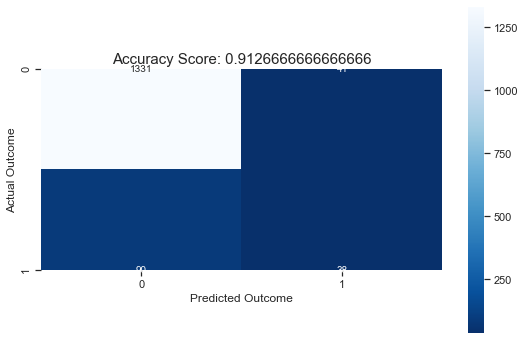

In [51]:
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt="g", square = True, cmap = 'Blues_r');
plt.ylabel('Actual Outcome');
plt.xlabel('Predicted Outcome');
all_sample_title = 'Accuracy Score: {0}'.format(knn_test_score)
plt.title(all_sample_title, size = 15);

##### precision and recall for the class 1 is very poor for the above model. If the model predicts only 4% of the potential 
##### customers who may take the accurately, it's not going to be very helpful to the company.

In [52]:
List=list(np.arange(1,20))
neigbors=list(filter(lambda x: x%2!=0,List))
Accuracy=[]
knn_auc=[]

In [53]:
for n in neigbors:
    knn=KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(X_train, Y_train)
    Y_pred=knn.predict(X_test)
    acc=metrics.accuracy_score(Y_test,Y_pred)
    Accuracy.append(acc)
    Y_prob=knn.predict_proba(X_test)
    auc=metrics.roc_auc_score(Y_test,Y_prob[:,1])
    knn_auc.append(auc)

MissClassification=[1-x for x in Accuracy]
MissClassification.index(min(MissClassification))
print("Misclassification comparison: %i" %neigbors[MissClassification.index(min(MissClassification))])
print("AUC comparison: %i" %neigbors[knn_auc.index(max(knn_auc))])

Misclassification comparison: 11
AUC comparison: 17


In [54]:
knn=KNeighborsClassifier(n_neighbors=17, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [55]:
knn_test_score = knn.score(X_test, Y_test)
cm = metrics.confusion_matrix(Y_test, knn.predict(X_test))
print("Score : %.2f" %knn_test_score)
print(metrics.classification_report(Y_test, knn.predict(X_test)))
print("Confusion Metrix : \n", cm)

Score : 0.91
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1372
           1       0.40      0.06      0.11       128

    accuracy                           0.91      1500
   macro avg       0.66      0.53      0.53      1500
weighted avg       0.87      0.91      0.88      1500

Confusion Metrix : 
 [[1360   12]
 [ 120    8]]


In [56]:
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt="g", square = True, cmap = 'Blues_r');
plt.ylabel('Actual Outcome');
plt.xlabel('Predicted Outcome');
all_sample_title = 'Accuracy Score: {0}'.format(knn_test_score)
plt.title(all_sample_title, size = 15);

In [57]:
knn_Sensitivity = 8/(120+8)
print(knn_Sensitivity)

0.0625


## Native Bayes

In [58]:
gnb=GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
gnb_test_score = gnb.score(X_test, Y_test)
cm = metrics.confusion_matrix(Y_test, gnb.predict(X_test))
print("Score : %.2f" %gnb_test_score)
print(metrics.classification_report(Y_test, gnb.predict(X_test)))
print("Confusion Metrix : \n", cm)

Score : 0.89
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1372
           1       0.39      0.59      0.47       128

    accuracy                           0.89      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.89      0.90      1500

Confusion Metrix : 
 [[1257  115]
 [  53   75]]


In [60]:
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt="g", square = True, cmap = 'Blues_r');
plt.ylabel('Actual Outcome');
plt.xlabel('Predicted Outcome');
all_sample_title = 'Accuracy Score: {0}'.format(gnb_test_score)
plt.title(all_sample_title, size = 15);

In [61]:
gnb_Sensitivity = 75/(53+75)
print(gnb_Sensitivity)

0.5859375


### Poor predicatability for classs 1 for precision and recall

## Model Comparision

In [62]:
comparision={'Accuracy' : [logreg_test_score,knn_test_score,gnb_test_score],
            'Sensitivity' : [logreg_Sensitivity,knn_Sensitivity,gnb_Sensitivity]}
comparision = pd.DataFrame(comparision, index=['Logistic Regression', 'KNN', 'Native Bayes'])
comparision

Accuracy  Sensitivity
Logistic Regression     0.918     0.375000
KNN                     0.912     0.062500
Native Bayes            0.888     0.585938

In [63]:
plt.plot(comparision.index,comparision.Sensitivity, 'g--', label='Sensitivity')
plt.plot(comparision.index,comparision.Accuracy, 'r--', label='Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.title("Metrics Comparison")

Text(0.5, 1.0, 'Metrics Comparison')

## Conclusion
Thera Bank Marketing Campaign can use can use **Logistic Regression** as the highest accuracy and we can choose that as our final model for likehood of a liability customer buying personal loans